In [1]:
install.packages("forecast")
install.packages("data.table")
install.packages("ggplot2")
install.packages("lmtest")
install.packages("TTR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(forecast)
library(data.table)
library(ggplot2)
library(lmtest)
library(TTR)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




###2

#### (1) female.txt : 월별 전문기술행정직에 종사하는 여성 근로자 수

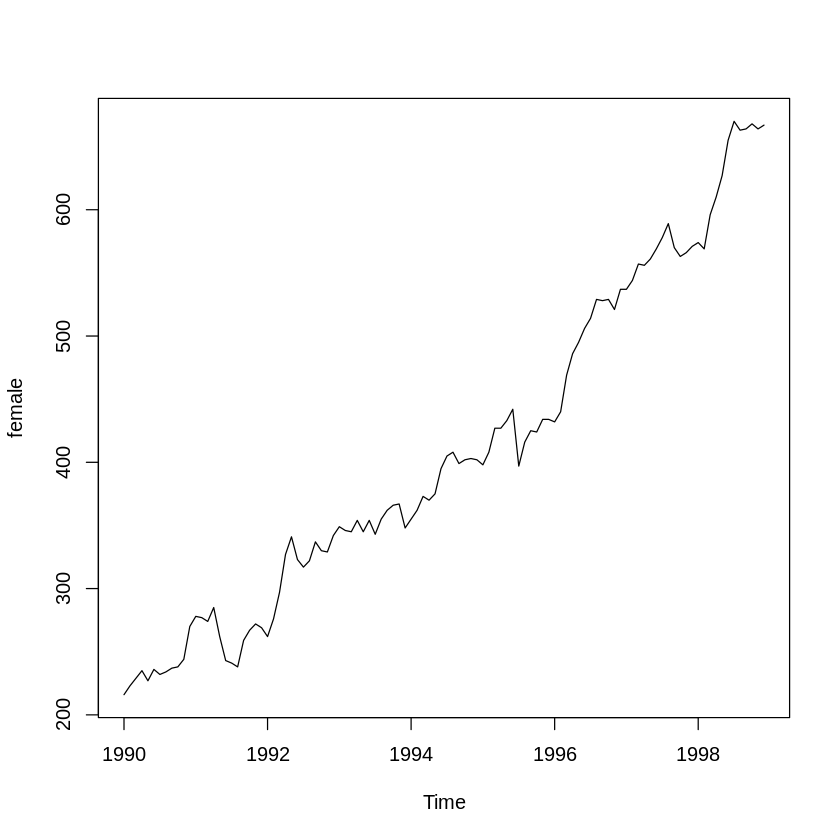

In [27]:
f=scan("female.txt")
female=ts(f,start=c(1990,1),frequency=12)
plot.ts(female)

In [28]:
length(f)

[1] 108

추세는 존재하고, 계절성분(?) 은 존재하는 것 같기도 함

- 전반적으로 증가하는 추세가 존재하므로 먼저 이중지수 평활법을 사용하는게 적합할 것 같음

In [29]:
fit1=holt(female,h=12)
fit1$model

Holt's method 

Call:
 holt(y = female, h = 12) 

  Smoothing parameters:
    alpha = 0.9825 
    beta  = 1e-04 

  Initial states:
    l = 214.2297 
    b = 4.1229 

  sigma:  11.4927

     AIC     AICc      BIC 
1039.003 1039.592 1052.414 

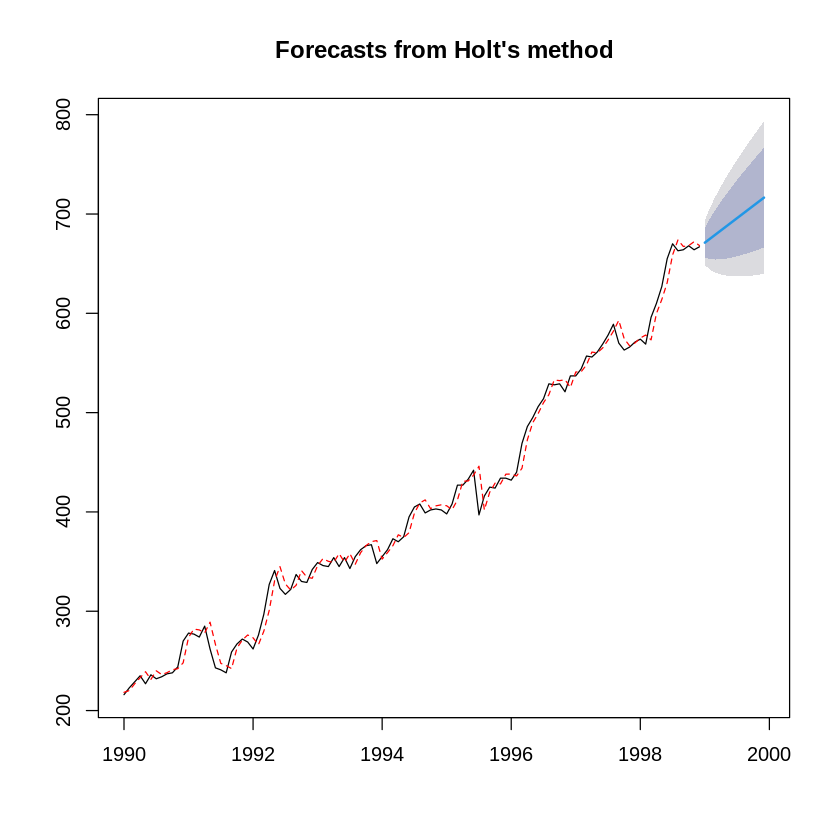

In [30]:
plot(fit1,lty=1,col="black")
lines(fitted(fit1),lty=2,col="red")

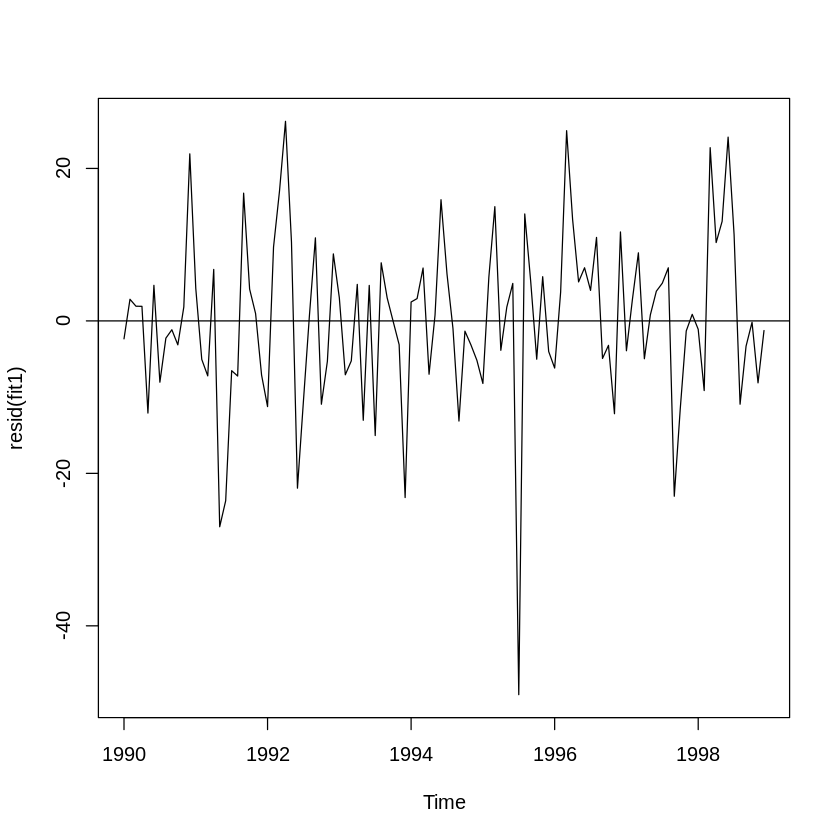

In [31]:
plot(resid(fit1))
abline(h=0)

- 오차의 평균이 0인지 확인 -> t-test

In [32]:
t.test(resid(fit1))


	One Sample t-test

data:  resid(fit1)
t = 0.06789, df = 107, p-value = 0.946
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.087267  2.235301
sample estimates:
 mean of x 
0.07401668 


- (2) "export.txt"

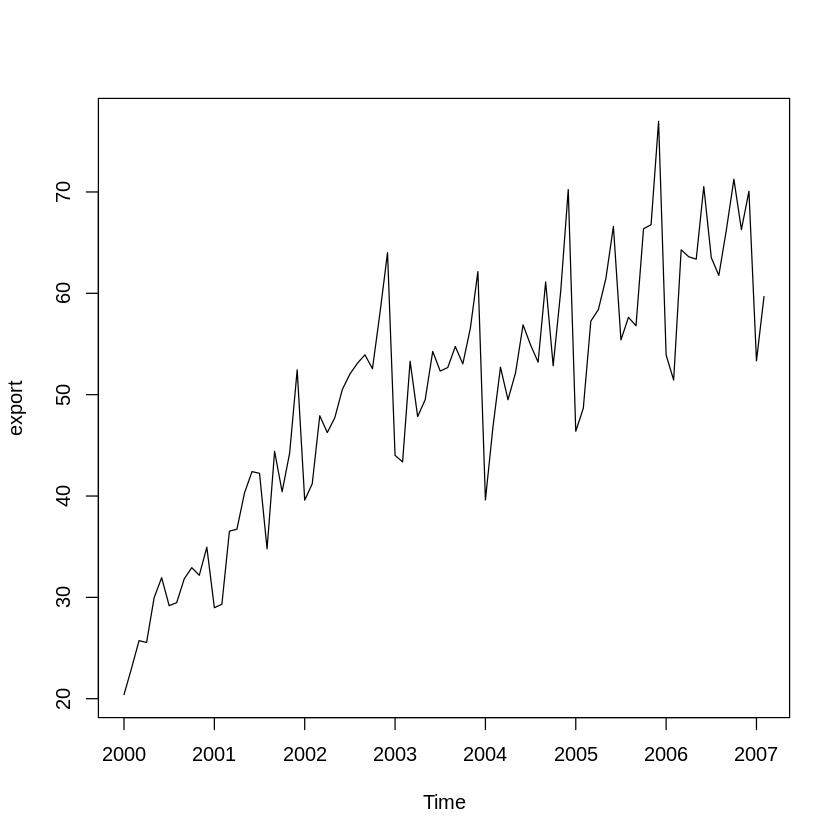

In [33]:
e=scan("export.txt")
export=ts(e,start=c(2000,1),frequency=12)
plot.ts(export)

- 추세는 존재하고 계절성도 존재한다고 얘기할 수 있을 것 같다!
- 이분산성은 없어보이므로 가법모형을 사용해도 될 것 같다

In [34]:
fit_hw_ex=HoltWinters(export)
fit_hw_ex

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = export)

Smoothing parameters:
 alpha: 0.3304767
 beta : 0.04369053
 gamma: 0.6102758

Coefficients:
           [,1]
a    66.9300146
b     0.3670945
s1   -0.9590061
s2   -2.3460160
s3   -1.4388022
s4    4.0020957
s5   -2.8546787
s6   -3.1036803
s7    0.4486017
s8    3.3118493
s9    1.6302355
s10   8.0731659
s11 -11.5480012
s12  -8.8892298

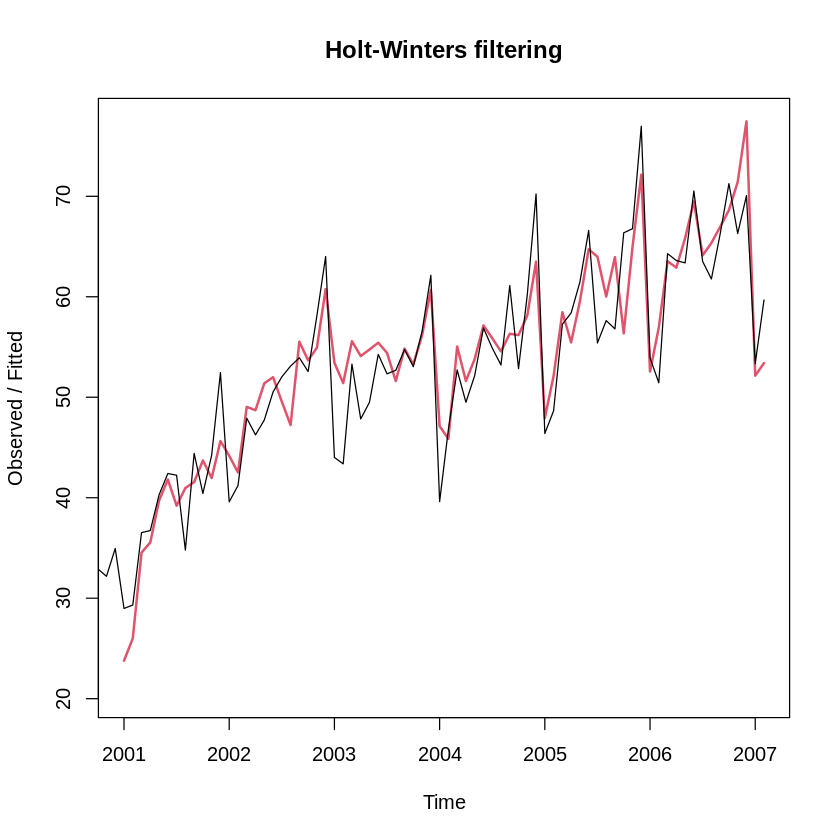

In [35]:
plot(fit_hw_ex,lwd=2)

In [36]:
predict(fit_hw_ex,n.ahead=12,prediction.interval = T,level = 0.95)

,fit,upr,lwr
Mar 2007,66.33810,74.01616,58.66004
Apr 2007,65.31819,73.44013,57.19624
May 2007,66.59250,75.17031,58.01468
Jun 2007,72.40049,81.44570,63.35528
Jul 2007,65.91081,75.43453,56.38708
Aug 2007,66.02890,76.04190,56.01590
Sep 2007,69.94828,80.46097,59.43558
Oct 2007,73.17862,84.20113,62.15611
Nov 2007,71.86410,83.40626,60.32194
Dec 2007,78.67413,90.74554,66.60271


In [37]:
fit_e=hw(export,alpha=fit_hw_ex$alpha,beta=fit_hw_ex$beta,gamma=fit_hw_ex$gamma,
        seasonal="additive",initial="simple",h=12)
fit_e$model

Holt-Winters' additive method 

Call:
 hw(y = export, h = 12, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_hw_ex$alpha, beta = fit_hw_ex$beta, gamma = fit_hw_ex$gamma) 

  Smoothing parameters:
    alpha = 0.3305 
    beta  = 0.0437 
    gamma = 0.6103 

  Initial states:
    l = 28.9283 
    b = 0.8727 
    s = 6.0217 3.2517 4.0017 2.9017 0.5517 0.2517
           3.0117 1.0317 -3.3783 -3.1983 -5.9183 -8.5283

  sigma:  3.6062

In [38]:
fit_e

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 2007       66.50720 61.88563 71.12876 59.43913 73.57527
Apr 2007       65.68937 60.75488 70.62385 58.14273 73.23601
May 2007       66.24118 60.94227 71.54010 58.13720 74.34517
Jun 2007       72.67945 66.96731 78.39158 63.94349 81.41541
Jul 2007       64.91363 58.74267 71.08458 55.47597 74.35129
Aug 2007       64.37679 57.70471 71.04886 54.17273 74.58085
Sep 2007       68.55746 61.34513 75.76980 57.52715 79.58778
Oct 2007       73.46214 65.67331 81.25096 61.55016 85.37412
Nov 2007       70.59181 62.19288 78.99075 57.74675 83.43688
Dec 2007       77.57678 68.53640 86.61715 63.75071 91.40284
Jan 2008       59.96274 50.25161 69.67388 45.11085 74.81464
Feb 2008       63.40430 52.99484 73.81375 47.48440 79.32419

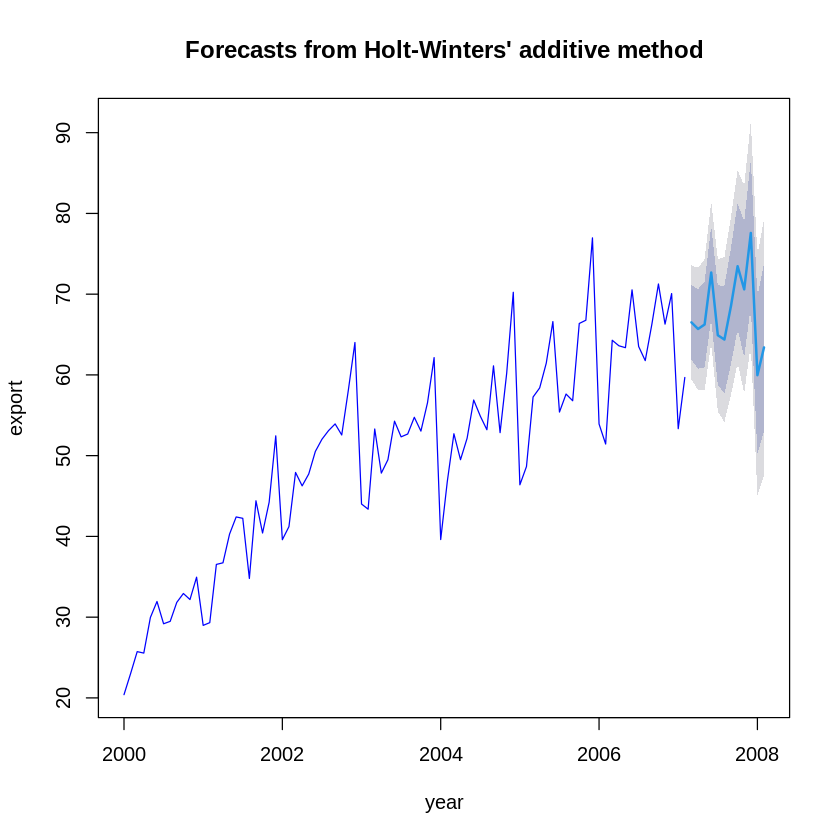

In [39]:
plot(fit_e,xlab="year",ylab="export",lty=1,col="blue")

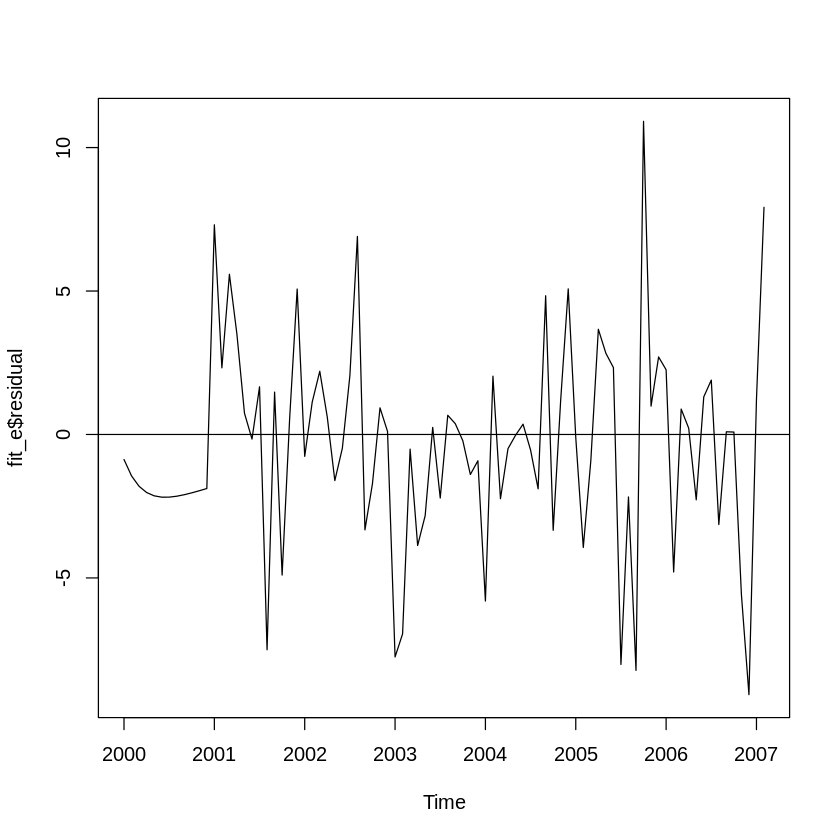

In [40]:
ts.plot(fit_e$residual)
abline(h=0)

In [41]:
t.test(fit_e$residual)


	One Sample t-test

data:  fit_e$residual
t = -1.0848, df = 85, p-value = 0.2811
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.1937802  0.3509863
sample estimates:
 mean of x 
-0.4213969 


In [42]:
dwtest(lm(fit_e$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit_e$residual ~ 1)
DW = 1.8443, p-value = 0.4681
alternative hypothesis: true autocorrelation is not 0


In [43]:
summary(fit_e)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = export, h = 12, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_hw_ex$alpha, beta = fit_hw_ex$beta, gamma = fit_hw_ex$gamma) 

  Smoothing parameters:
    alpha = 0.3305 
    beta  = 0.0437 
    gamma = 0.6103 

  Initial states:
    l = 28.9283 
    b = 0.8727 
    s = 6.0217 3.2517 4.0017 2.9017 0.5517 0.2517
           3.0117 1.0317 -3.3783 -3.1983 -5.9183 -8.5283

  sigma:  3.6062
Error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.4213969 3.606225 2.659535 -1.231415 5.700809 0.4192349
                  ACF1
Training set 0.0462655

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 2007       66.50720 61.88563 71.12876 59.43913 73.57527
Apr 2007       65.68937 60.75488 70.62385 58.14273 73.23601
May 2007       66.24118 60.94227 71.54010 58.13720 74.34517
Jun 2007       72.67

In [44]:
summary(fit_hw_ex)

             Length Class  Mode     
fitted       296    mts    numeric  
x             86    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients  14    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           2    -none- call     

### (3) "data1.csv"는 모의실험에 의해 생성된 시계열자료이다. 다음 물음에 답하여라

In [45]:
d=read.csv("data1.csv")
head(d$z)

[1] -1.5346871  2.6850469 -0.4288189  1.3724199 -0.9800884  2.4156505

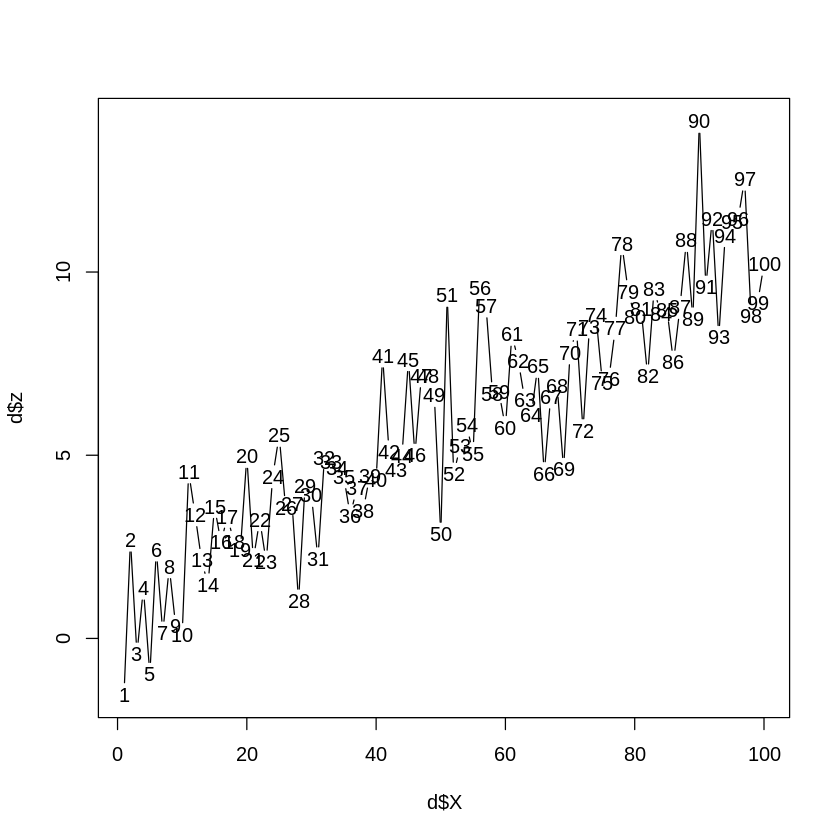

In [46]:
plot.ts(d$X,d$z)

In [47]:
data1=ts(d$z,d$t)

- 데이터를 확인해보니 이분산성은 존재하지 않는것같으므로 로그변환을 할 필요성은 없어보임
- 추세는 존재하고 계절성분이 존재하는지는 잘 모르겠음

- (3) 평활법 적용

In [48]:
head(data1)

A Time Series:
[1] -1.5346871  2.6850469 -0.4288189  1.3724199 -0.9800884  2.4156505

In [50]:
fit_d=holt(data1,h=10)
fit_d$model

Holt's method 

Call:
 holt(y = data1, h = 10) 

  Smoothing parameters:
    alpha = 0.0427 
    beta  = 1e-04 

  Initial states:
    l = 0.1376 
    b = 0.1041 

  sigma:  1.5238

     AIC     AICc      BIC 
550.6720 551.3103 563.6979 

ERROR: ignored

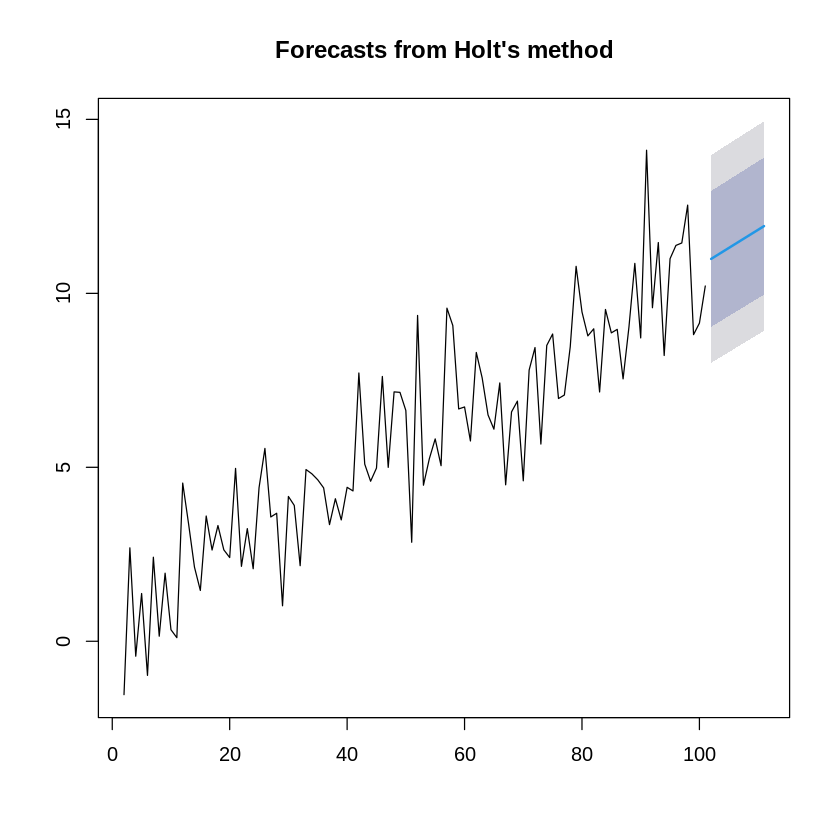

In [51]:
plot(fit_d,lty=1,col=1)
line(fitted(fit_d),col="red",lty=2)

#### 교수님 강의자료 순서대로 ->이동평균법-단순지수평활-이중지수평활순서

###이동평균법

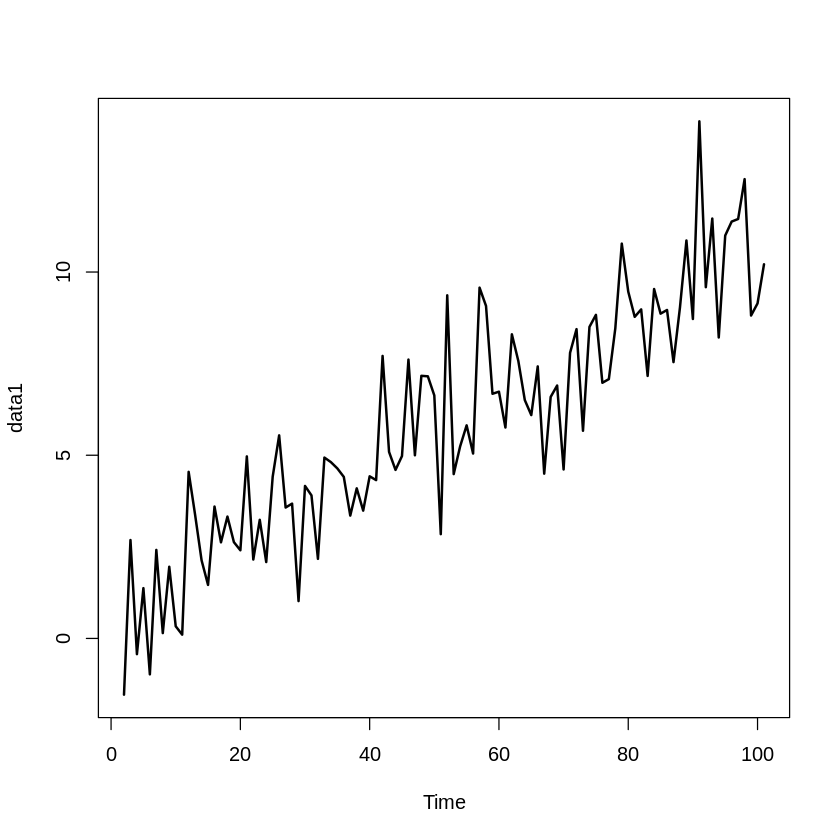

In [52]:
plot(data1,lwd=2)

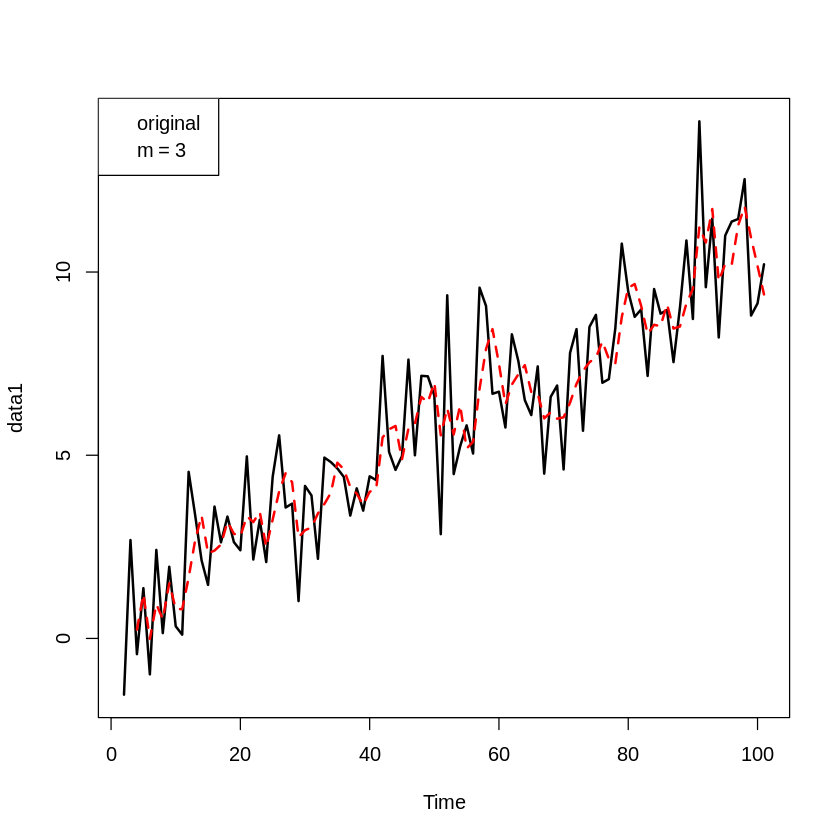

In [53]:
data1SMA3=SMA(data1,n=3) #3평활
plot.ts(data1,lwd=2)
lines(data1SMA3,col="red",lwd=2,lty=2)
legend("topleft",c("original",expression(m==3)))

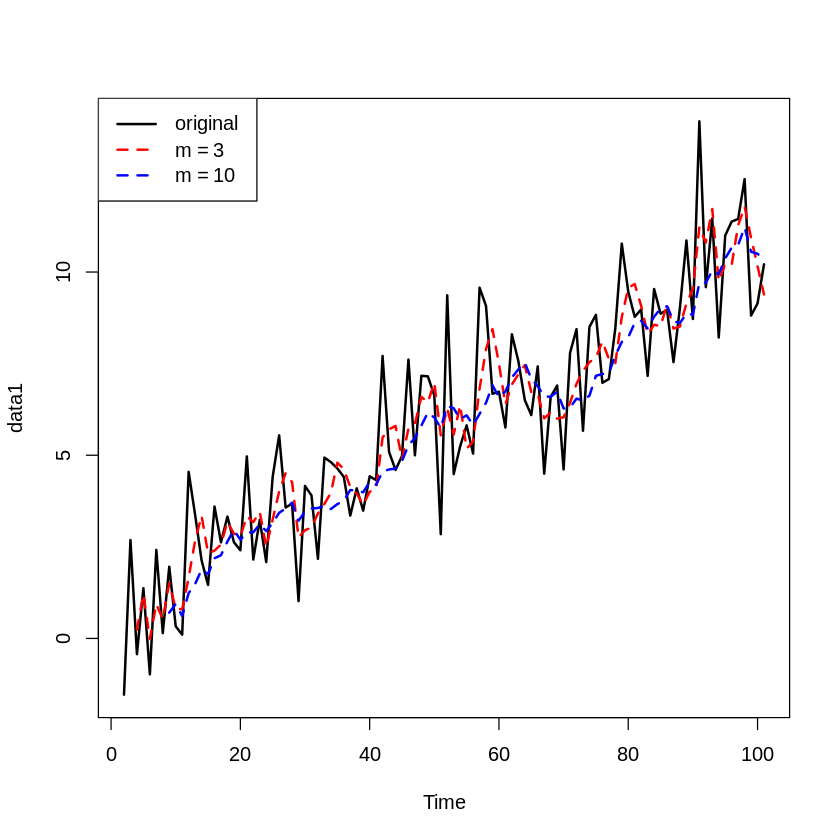

In [58]:
##window=3 vs 10
plot.ts(data1,lwd=2)
lines(data1SMA3,col="red",lty=2,lwd=2)
lines(SMA(data1,n=8),col="blue",lty=2,lwd=2)
legend("topleft",legend=c("original",expression(m==3),expression(m==10)),col=c("black","red","blue"),lty=c(1,2,2),lwd=2)

#### 모형 평가

In [59]:
mean((data1-data1SMA3)^2,na.rm=T)
mean((data1-SMA(data1,n=8))^2,na.rm=T)

[1] 1.375431

[1] 1.920795

###단순지수평활법

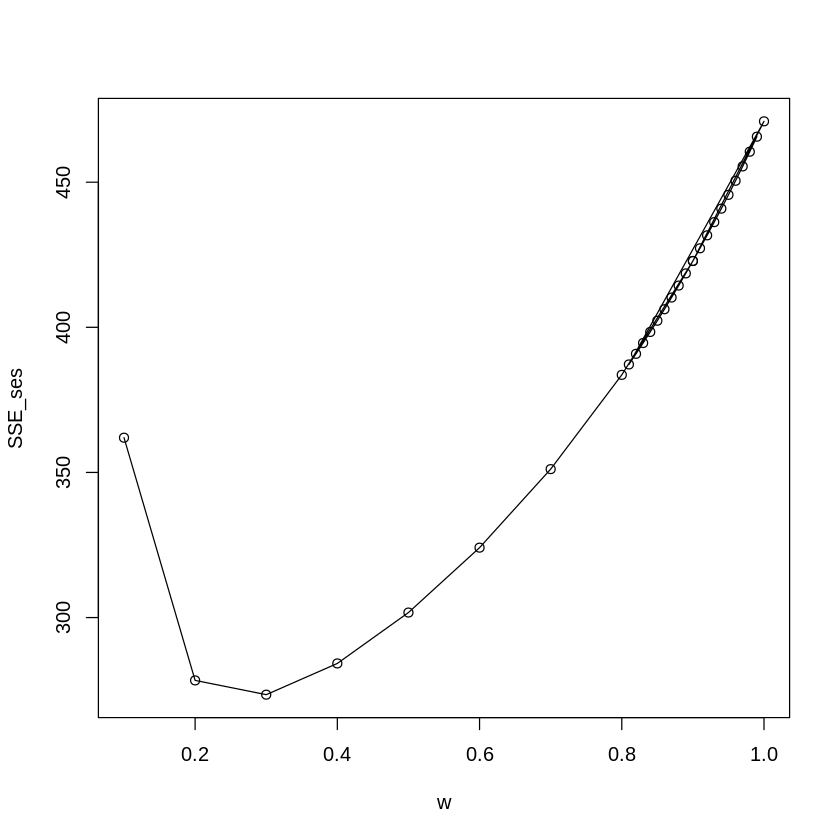

In [60]:
w=c(seq(0.1,1,0.1),seq(0.81,0.99,0.01))
SSE_ses=sapply(w,function(alpha) HoltWinters(data1,alpha=alpha,beta=FALSE,gamma=FALSE)$SSE)
plot(w,SSE_ses,type="o")

In [61]:
w[which.min(SSE_ses)]

[1] 0.3

- alpha값이 0.3일때 최소임을 알 수있음!

In [62]:
fit_hw=HoltWinters(data1,alpha=0.3,beta=FALSE,gamma=FALSE)
fit_ses=ses(data1,alpha=0.3,initial="simple",h=10)

In [63]:
fit_hw$SSE

[1] 273.4295

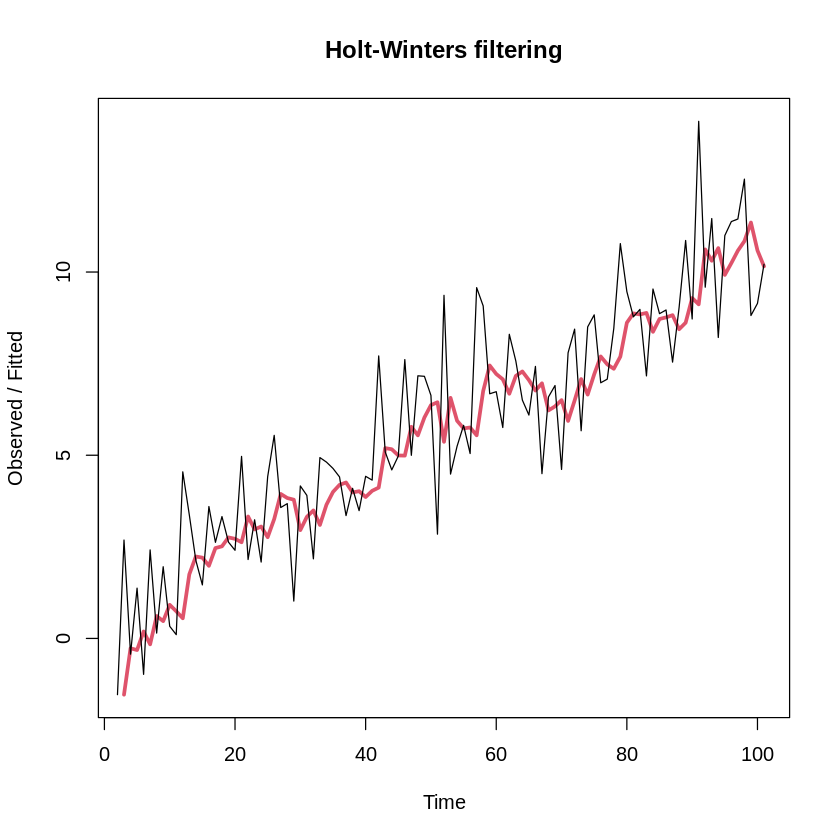

In [65]:
plot(fit_hw,lwd=3)

In [67]:
fit_hw

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = data1, alpha = 0.3, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.3
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 10.17258

In [68]:
summary(fit_ses)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = data1, h = 10, initial = "simple", alpha = 0.3) 

  Smoothing parameters:
    alpha = 0.3 

  Initial states:
    l = -1.5347 

  sigma:  1.6536
Error measures:
                    ME    RMSE     MAE       MPE     MAPE      MASE       ACF1
Training set 0.3902422 1.65357 1.25768 -5.850189 39.11595 0.7368552 -0.2353343

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
102       10.17258 8.053443 12.29171 6.931640 13.41352
103       10.17258 7.960136 12.38502 6.788940 13.55622
104       10.17258 7.870608 12.47455 6.652019 13.69314
105       10.17258 7.784434 12.56072 6.520227 13.82493
106       10.17258 7.701263 12.64389 6.393028 13.95213
107       10.17258 7.620801 12.72436 6.269972 14.07518
108       10.17258 7.542800 12.80236 6.150680 14.19448
109       10.17258 7.467047 12.87811 6.034826 14.31033
110       10.17258 7.393358 12.95180 5.922128 14.42303
111   

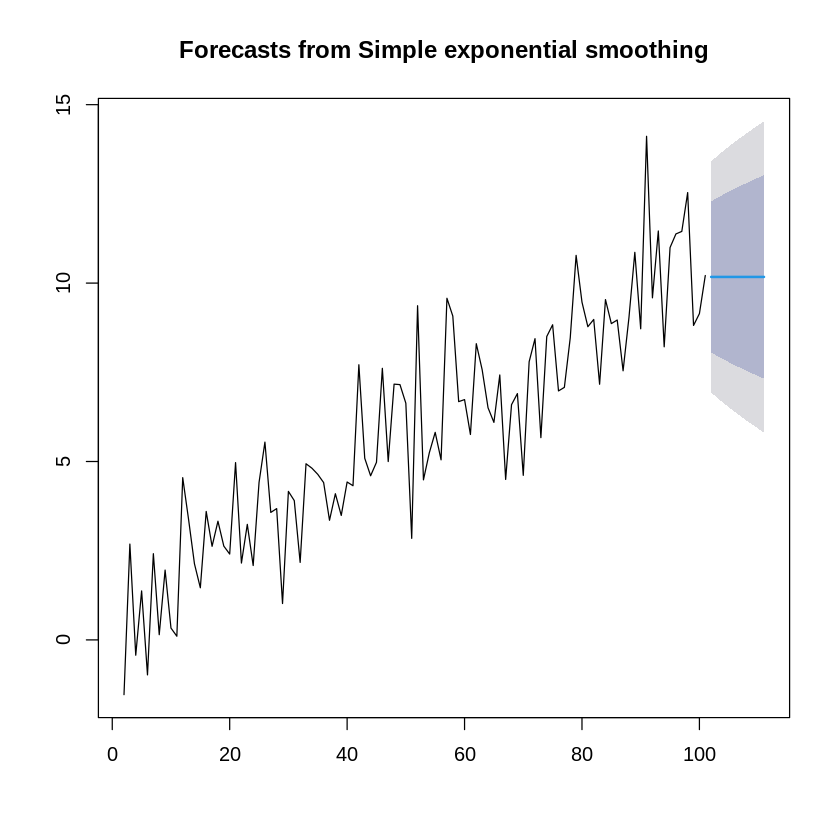

In [71]:
plot(fit_ses)

- 단순지수평활을 했기때문에 평균을 일정하게 예측

###잔차

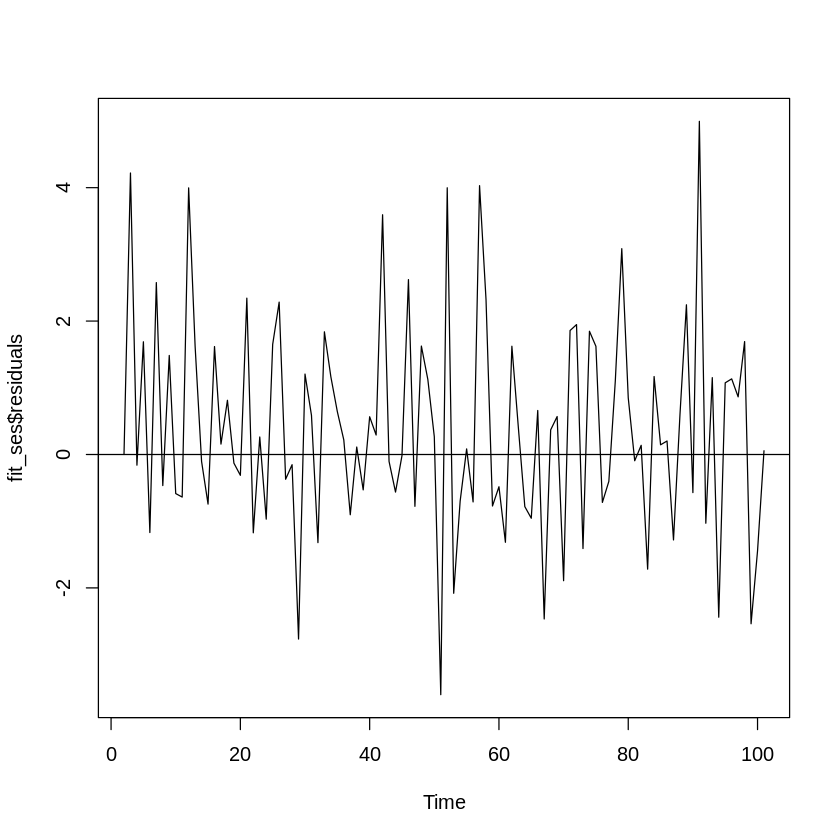

In [72]:
plot(fit_ses$residuals)
abline(h=0)

In [73]:
t.test(fit_ses$residuals)


	One Sample t-test

data:  fit_ses$residuals
t = 2.4164, df = 99, p-value = 0.01751
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.06979966 0.71068472
sample estimates:
mean of x 
0.3902422 


- 0이 아님.. ->다른평활을 해야함!

### 이중지수평활법

#### 이중지수평활 α,β 추정

In [77]:
fit_d2=holt(data1,h=10)  #자동추정
fit_d2$model

Holt's method 

Call:
 holt(y = data1, h = 10) 

  Smoothing parameters:
    alpha = 0.0427 
    beta  = 1e-04 

  Initial states:
    l = 0.1376 
    b = 0.1041 

  sigma:  1.5238

     AIC     AICc      BIC 
550.6720 551.3103 563.6979 

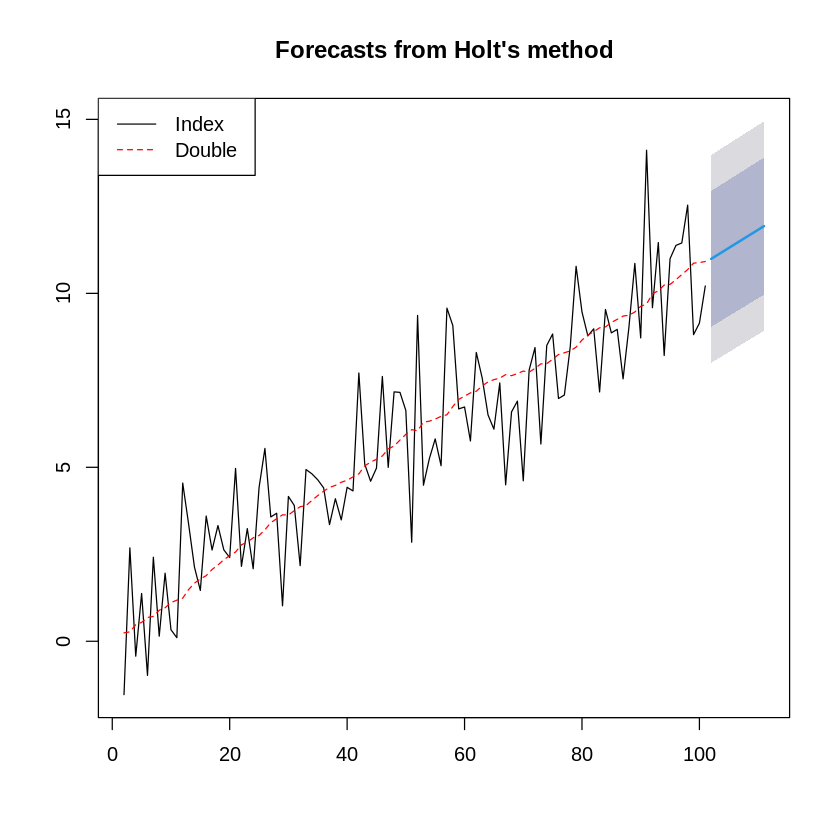

In [78]:
plot(fit_d2,lty=1,col="black")
lines(fitted(fit_d2),col="red",lty=2)
legend("topleft",lty=1:2,col=c("black","red"),c("Index","Double"))

- 잔차

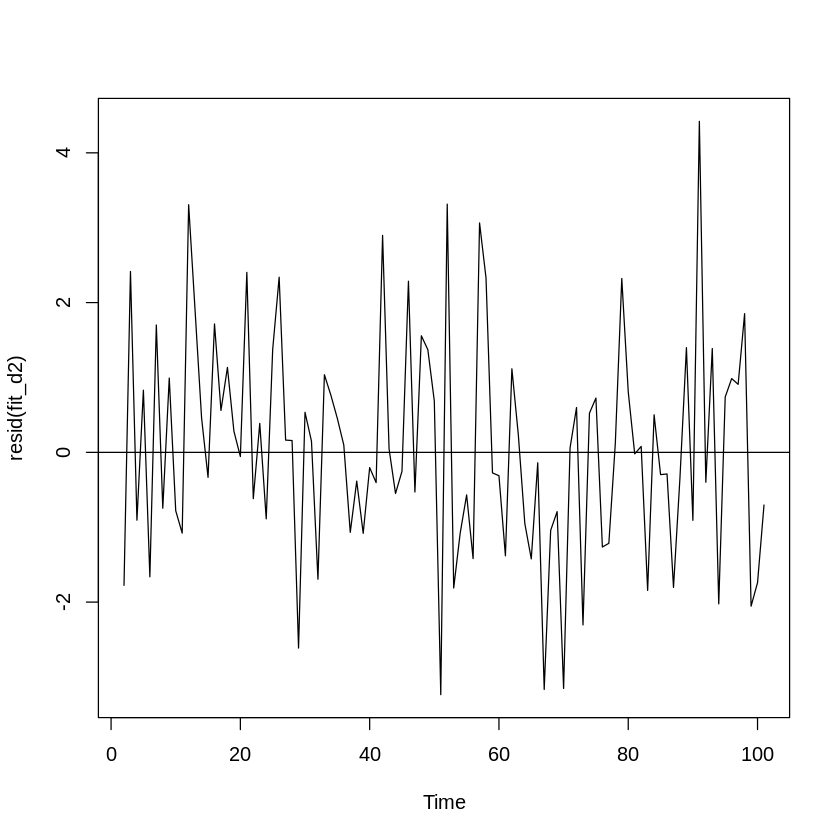

In [79]:
plot(resid(fit_d2))
abline(h=0)

In [80]:
t.test(resid(fit_d2))


	One Sample t-test

data:  resid(fit_d2)
t = 0.39227, df = 99, p-value = 0.6957
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2386872  0.3563151
sample estimates:
 mean of x 
0.05881397 


In [102]:
fit_d2

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
102       10.99007 9.037283 12.94286 8.003540 13.97660
103       11.09479 9.140220 13.04937 8.105531 14.08406
104       11.19952 9.243151 13.15589 8.207512 14.19153
105       11.30424 9.346075 13.26241 8.309482 14.29900
106       11.40897 9.448992 13.36894 8.411443 14.40649
107       11.51369 9.551902 13.47548 8.513393 14.51399
108       11.61842 9.654806 13.58203 8.615333 14.62150
109       11.72314 9.757703 13.68858 8.717262 14.72902
110       11.82787 9.860593 13.79514 8.819181 14.83655
111       11.93259 9.963477 13.90171 8.921090 14.94409

###계절지수평활

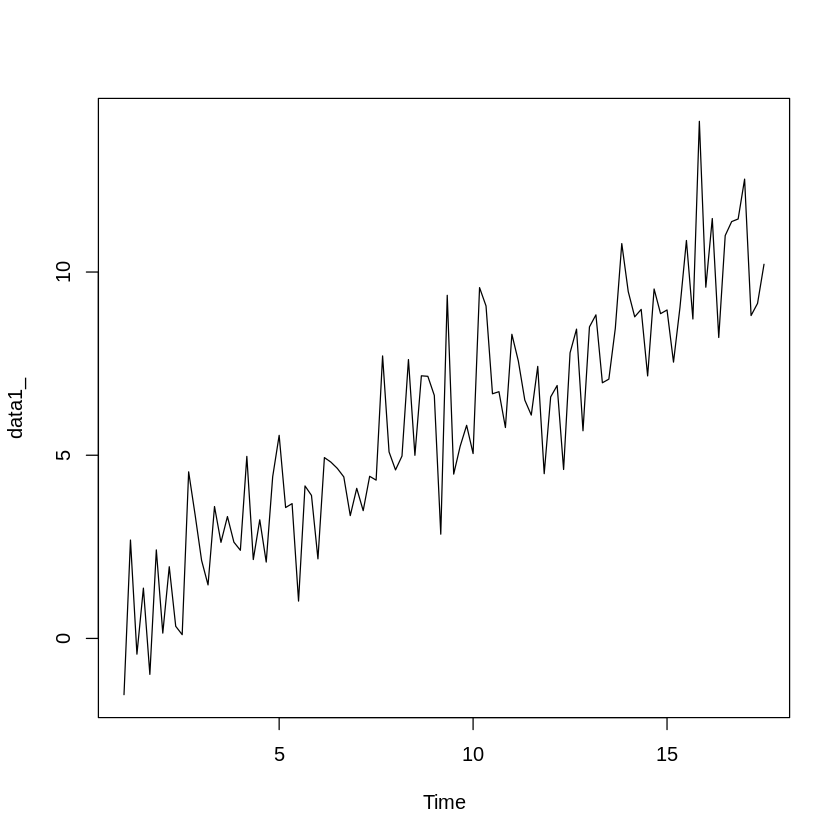

In [103]:
data1_=ts(data1,start=1,frequency=6)
plot.ts(data1_)

- 주기를 확인하기 어려워서 frequency가 10이라고 가정한 임시 ts데이터선언


####HoltWinter additive model

In [104]:
fit_d_hw=HoltWinters(data1_)
fit_d_hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = data1_)

Smoothing parameters:
 alpha: 0.07171534
 beta : 0.0490251
 gamma: 0.2849466

Coefficients:
         [,1]
a  11.5962437
b   0.1068319
s1 -0.3765308
s2  0.3094488
s3 -0.2013940
s4 -1.1355985
s5 -1.6675184
s6 -0.8774997

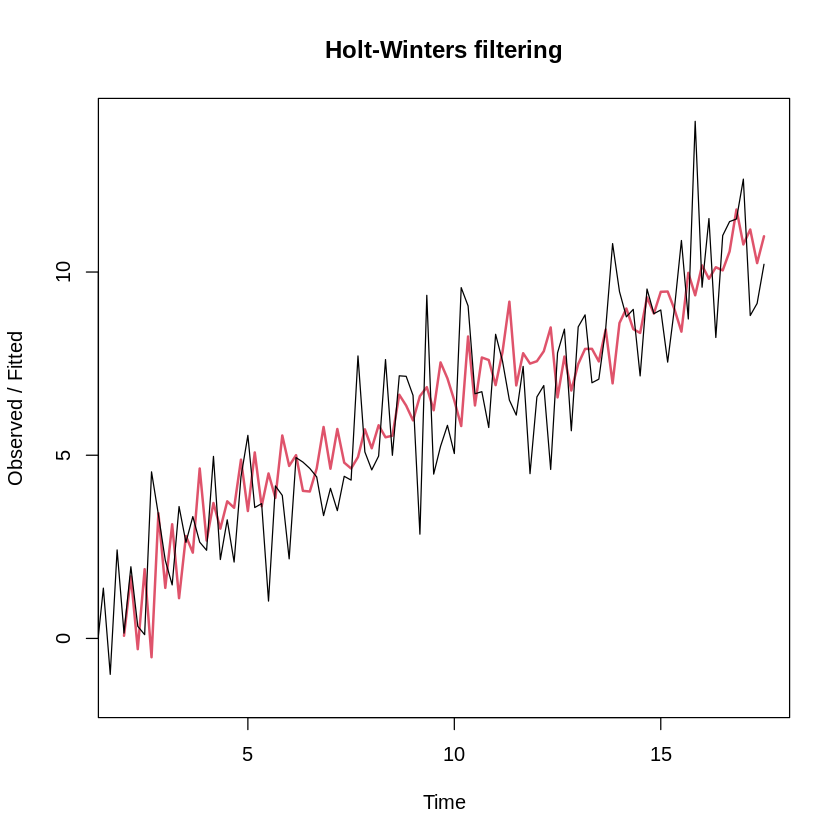

In [105]:
plot(fit_d_hw,lwd=2)

In [106]:
predict(fit_d_hw,n.ahead=10,prediction.interval=T,level=0.95)

,fit,upr,lwr
17.66667,11.32654,14.64190,8.011187
17.83333,12.11936,15.44408,8.794629
18.00000,11.71535,15.05031,8.380384
18.16667,10.88797,14.23407,7.541878
18.33333,10.46288,13.82104,7.104727
18.50000,11.35974,14.73092,7.988553
18.66667,11.96754,15.54081,8.394266
18.83333,12.76035,16.34786,9.172834
19.00000,12.35634,15.95909,8.753585
19.16667,11.52896,15.14798,7.909953


In [107]:
fit_d_hw1=hw(data1_,alpha=fit_d_hw$alpha,beta=fit_d_hw$beta,gamma=fit_d_hw$gamma,
            seasonal="additive",initial="simple",h=10)
fit_d_hw1$model

Holt-Winters' additive method 

Call:
 hw(y = data1_, h = 10, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_d_hw$alpha, beta = fit_d_hw$beta, gamma = fit_d_hw$gamma) 

  Smoothing parameters:
    alpha = 0.0717 
    beta  = 0.049 
    gamma = 0.2849 

  Initial states:
    l = 0.5883 
    b = 0.1924 
    s = 1.8274 -1.5683 0.7842 -1.0171 2.0968 -2.1229

  sigma:  1.6757

In [108]:
fit_d_hw1

         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
17.66667       11.32711  9.179610 13.47461 8.042791 14.61143
17.83333       12.18500 10.021897 14.34810 8.876821 15.49317
18.00000       11.73981  9.546207 13.93342 8.384981 15.09465
18.16667       10.84541  8.602053 13.08878 7.414489 14.27634
18.33333       10.39788  8.081963 12.71379 6.855993 13.93976
18.50000       11.36886  8.955058 13.78265 7.677271 15.06044
18.66667       11.96690  9.177675 14.75612 7.701150 16.23265
18.83333       12.82478  9.896709 15.75286 8.346681 17.30288
19.00000       12.37960  9.286681 15.47252 7.649389 17.10981
19.16667       11.48520  8.201980 14.76842 6.463947 16.50646

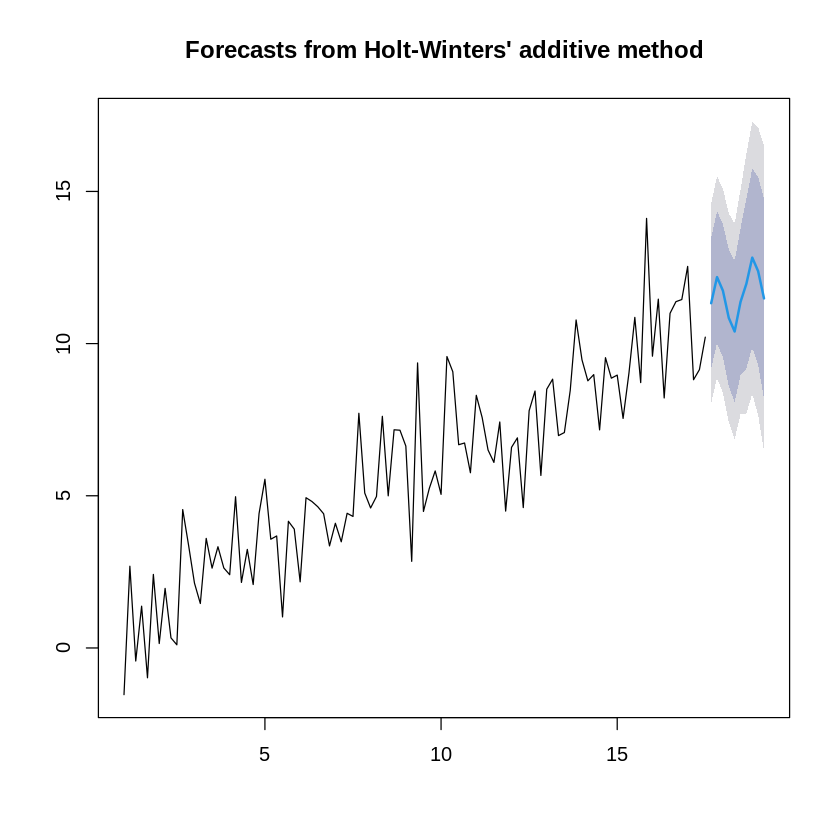

In [109]:
plot(fit_d_hw1)

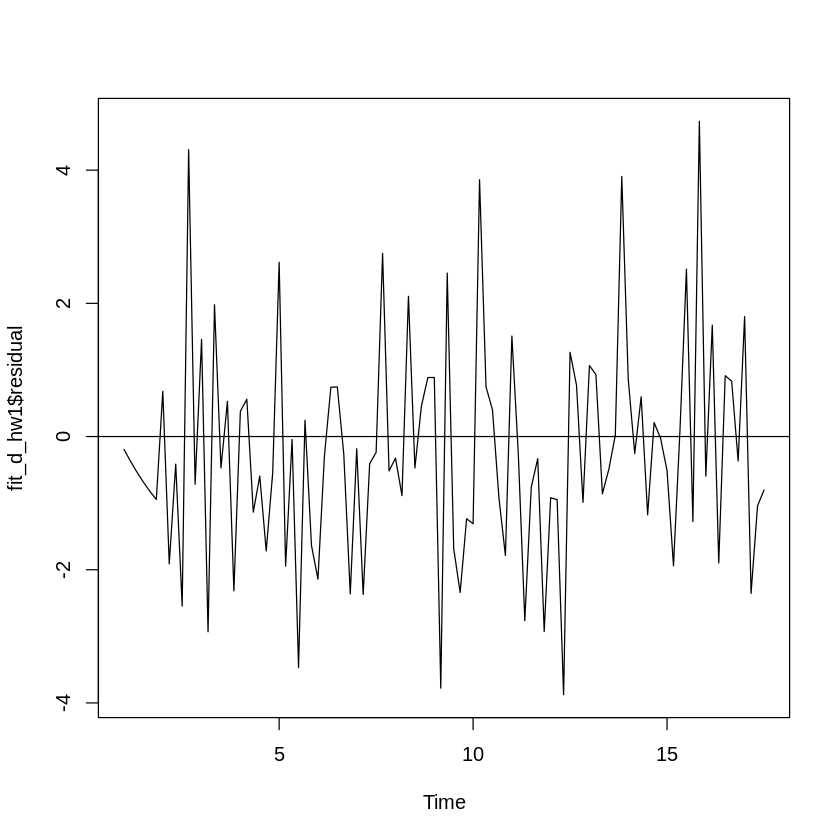

In [110]:
ts.plot(fit_d_hw1$residual)
abline(h=0)

In [101]:
dwtest(lm(fit_d_hw1$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit_d_hw1$residual ~ 1)
DW = 2.3311, p-value = 0.09443
alternative hypothesis: true autocorrelation is not 0


- 양의 상관관계